In [33]:
# importing useful libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [6]:
df=pd.read_csv("student.csv")

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing Input and output data to feed in the model

In [16]:
x=df.drop(columns=["math score"],axis=1) #input

In [17]:
y=df["math score"]                       #output

In [21]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

In [24]:
print(cat_features)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [25]:
print(num_features)

Index(['reading score', 'writing score'], dtype='object')


In [28]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [30]:
X=preprocessor.fit_transform(x)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [51]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2score=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2score=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2score)
    print("Model Performance for training set")
    print("RMSE:{:.4f}".format(model_train_rmse))
    print("MAE:{:.4f}".format(model_train_mae))
    print("R2 Score:{:.4f}".format(model_train_r2score))
    print("------------------------------------------------------")
    print("Model Performance for test set")
    print("RMSE:{:.4f}".format(model_test_rmse))
    print("MAE:{:.4f}".format(model_test_mae))
    print("R2 Score:{:.4f}".format(model_test_r2score))
    print()
    
    
    

Linear Regression
Model Performance for training set
RMSE:5.2483
MAE:4.1985
R2 Score:0.8751
------------------------------------------------------
Model Performance for test set
RMSE:5.5576
MAE:4.4183
R2 Score:0.8759

Lasso
Model Performance for training set
RMSE:6.5106
MAE:5.1582
R2 Score:0.8078
------------------------------------------------------
Model Performance for test set
RMSE:6.8705
MAE:5.3929
R2 Score:0.8103

Ridge
Model Performance for training set
RMSE:5.2487
MAE:4.1977
R2 Score:0.8751
------------------------------------------------------
Model Performance for test set
RMSE:5.5566
MAE:4.4155
R2 Score:0.8759

K-Neighbors Regressor
Model Performance for training set
RMSE:5.6713
MAE:4.5037
R2 Score:0.8542
------------------------------------------------------
Model Performance for test set
RMSE:7.5235
MAE:5.8360
R2 Score:0.7725

Decision Tree
Model Performance for training set
RMSE:0.2988
MAE:0.0214
R2 Score:0.9996
------------------------------------------------------
Model

Result

In [54]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2 score']).sort_values(by=["R2 score"],ascending=False)

,Model name,R2 score
2,Ridge,0.875907
0,Linear Regression,0.875863
7,CatBoosting Regressor,0.852108
5,Random Forest Regressor,0.846728
8,AdaBoost Regressor,0.832401
6,XGBRegressor,0.811816
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772507
4,Decision Tree,0.733519


In [55]:
linear_model=LinearRegression(fit_intercept=True)
lin_model=linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
score_r2_sa=r2_score(y_test,y_pred)*100
score_test=lin_model.score(X_test,y_test)*100
print(f"r2 score sa result: {score_r2_sa}")
print(f"model score sa result: {score_test}")




r2 score sa result: 87.58630443016735
model score sa result: 87.58630443016735


Plot y_test vs y_pred

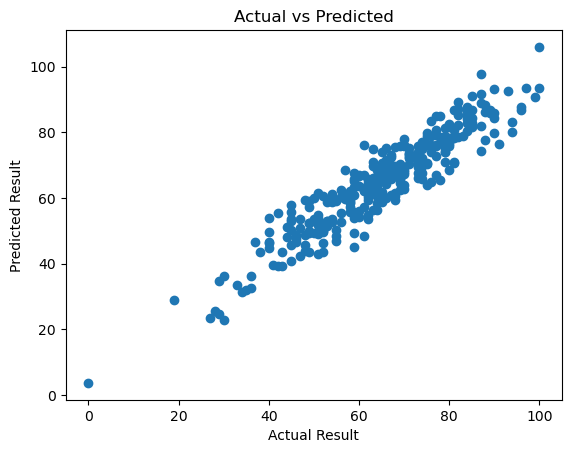

In [56]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.title("Actual vs Predicted")
plt.show()